<a href="https://colab.research.google.com/github/vaishnaviii28/EDA/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('/train.csv')

In [22]:
df.head ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Column Types


*   **Numerical -** PassengerID,  Age , Fare
*  **Categorical -** Sex, Embarked, Survived, Pclass, SibSp, Parch
*   **Mixed -** Ticket, Cabin, Name






##Univariate Analysis on Numerical Columns


### Age

**Conclusion**
- Age is normally (alsmost) distributed
-20% of the values are missing
-There are some outliers

In [23]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

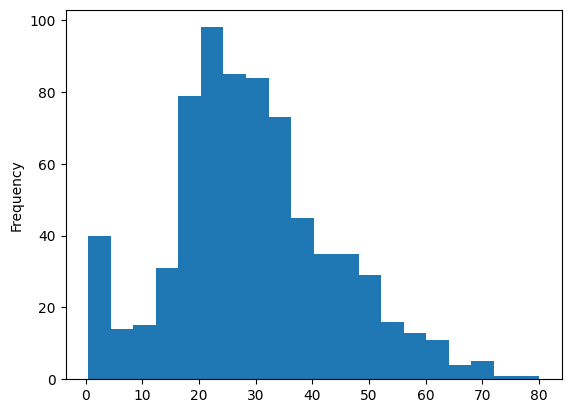

In [24]:
df['Age'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

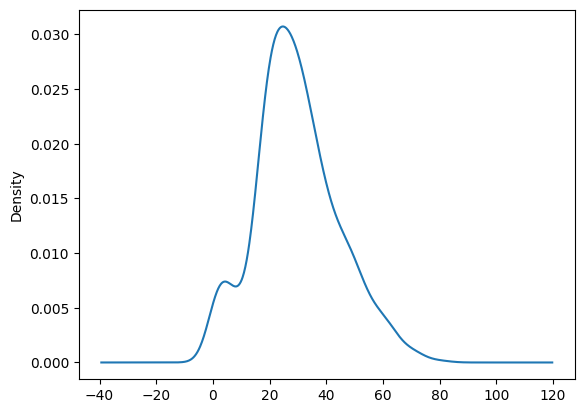

In [25]:
df['Age'].plot(kind='kde')

<Axes: >

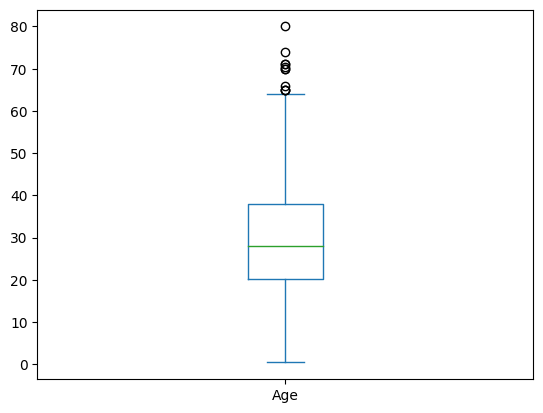

In [26]:
df['Age'].plot(kind='box')

here we can identify the outliers, now lets check are they really outliers?


In [27]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [28]:
df['Age'].isnull().sum()

177

In [29]:
len(df['Age'])

891

we have 177 null values for age column among 891 rows





In [30]:
df['Age'].isnull().sum()/len(df['Age']) # percentage of the missing values

0.19865319865319866

### Fare

**Conclusion**
- The data is highly (positively) skewed
-Fare column contain the group fare and not the individual fare (this might be an issue )
- We need to create a new column called individual fare

In [31]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

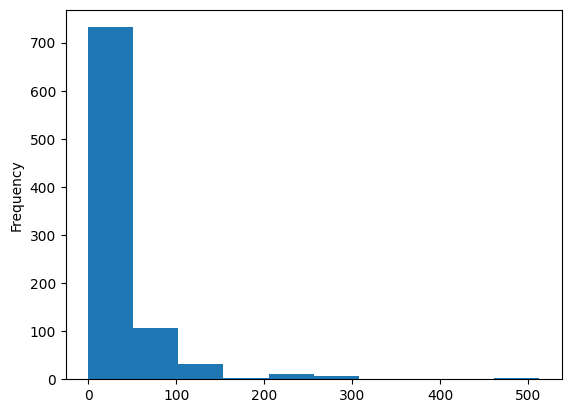

In [32]:
df['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

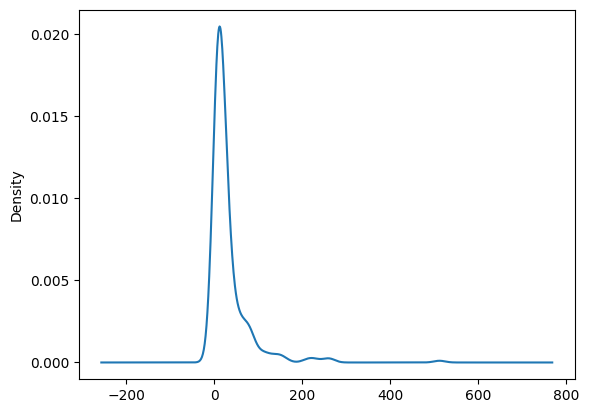

In [33]:
df['Fare'].plot(kind='kde')

In [34]:
df['Fare'].skew()

4.787316519674893

<Axes: >

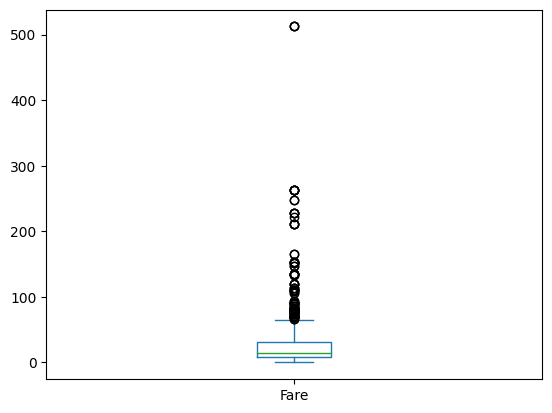

In [35]:
df['Fare'].plot(kind='box')

In [36]:
df[df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [37]:
df['Fare'].isnull().sum()

0

##Univariate Analysis on Numerical Columns

### Survived

**Conclusion**

In [39]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

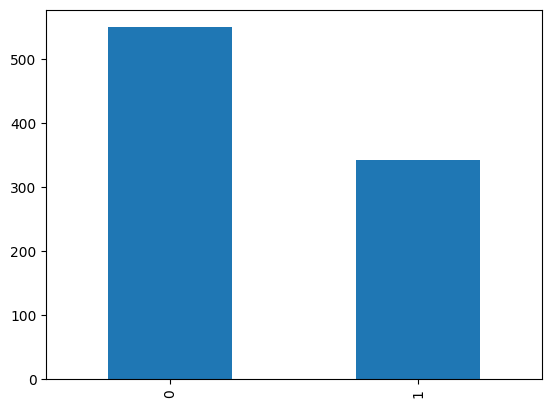

In [41]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='Survived'>

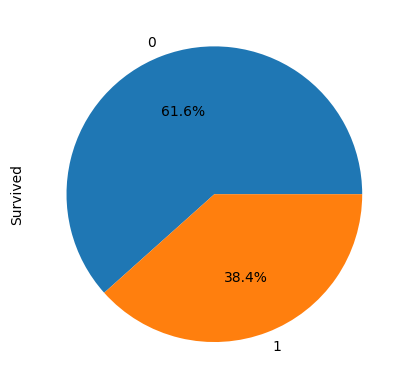

In [44]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [46]:
df['Survived'].isnull().sum()

0

SyntaxError: ignored

### Pclass

**conclusion**
- suprizingly less people travel in class 2 compare to class 1

In [48]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: >

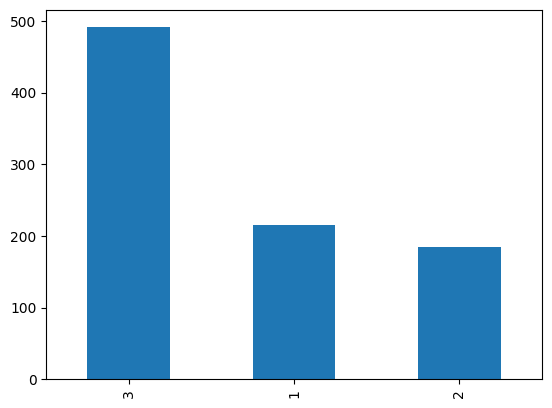

In [49]:
df['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='Pclass'>

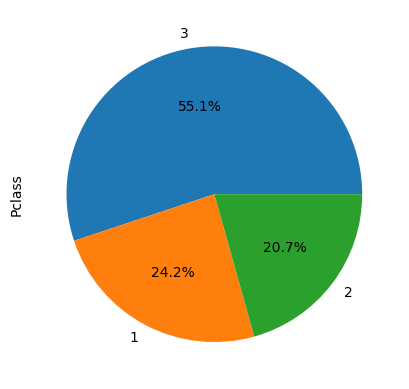

In [50]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [54]:
df['Pclass'].isnull().sum()

0

### Sex

**conclusion**


In [51]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: >

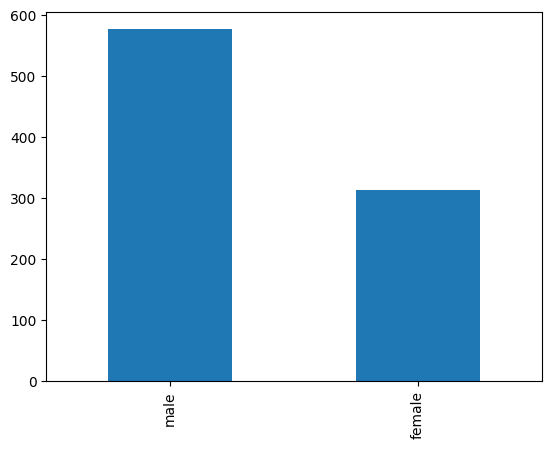

In [52]:
df['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='Sex'>

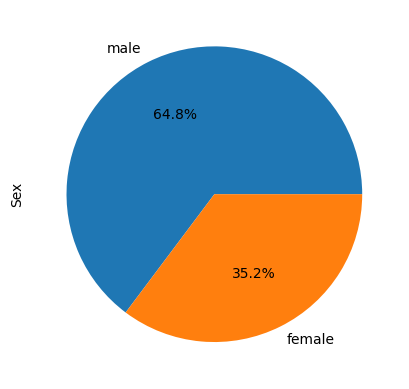

In [53]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [55]:
df['Sex'].isnull().sum()

0

### SibSp

**conclusion**


In [56]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<Axes: >

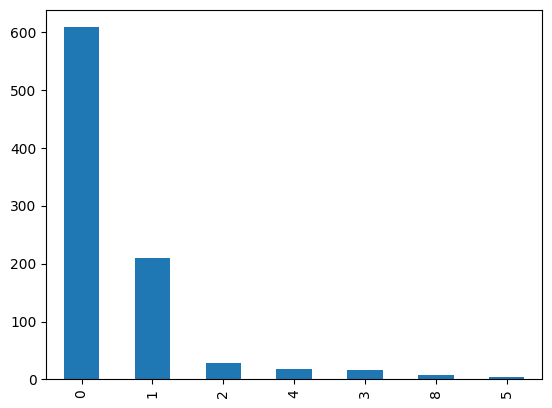

In [57]:
df['SibSp'].value_counts().plot(kind='bar')

<Axes: ylabel='SibSp'>

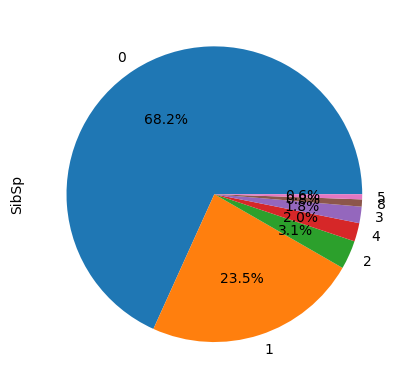

In [58]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [59]:
df['SibSp'].isnull().sum()

0

### Parch

**conclusion**
- Parch and SibSp columns can be mereged to form a new column called Family_size
-Create a column called alone


In [60]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<Axes: >

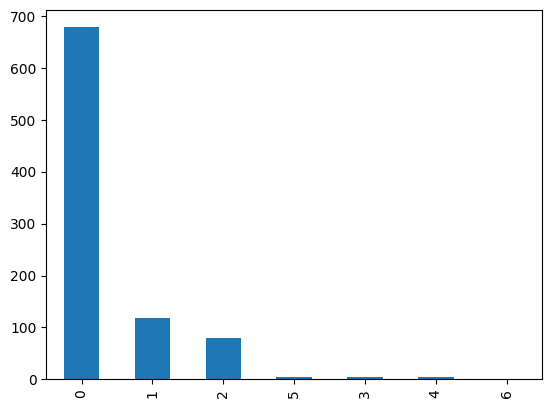

In [61]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='Parch'>

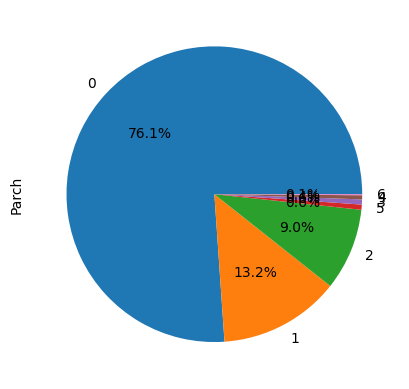

In [62]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [63]:
df['Parch'].isnull().sum()

0

### Embarked

**conclusion**

In [64]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: >

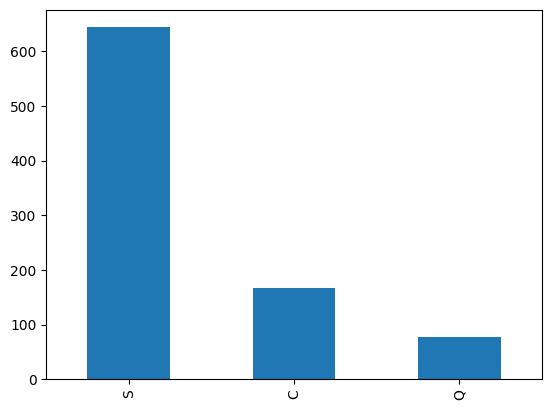

In [65]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='Embarked'>

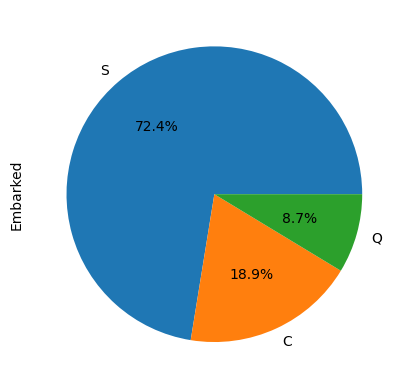

In [66]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [67]:
df['Embarked'].isnull().sum()

2

## Bivariate Analysis

### Survival vs Pcalss

**Conclusion :** Traveling in Pclass 1 was the safest class whereas traveling in Pclass 3 was the most dangeourous

In [72]:
pd.crosstab(df['Survived'],df['Pclass'], normalize='columns')*100 #normalize in terms of columns (percentage value)

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

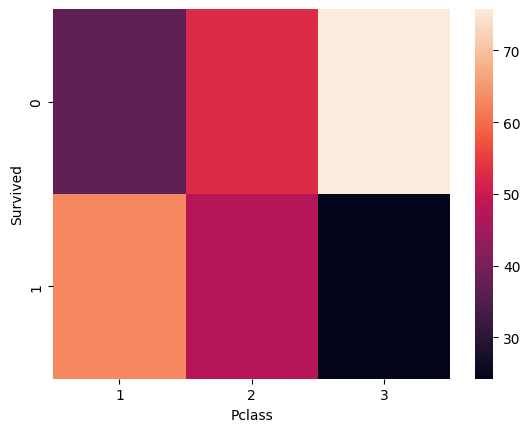

In [74]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'], normalize='columns')*100 )

### Survival vs Sex

**Conclusion:** Truely we can see the difference that Females are given the  safety priority has it has more perecentage of survival

In [75]:
pd.crosstab(df['Survived'],df['Sex'], normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


### Survival vs Embarked

**Conclusion:**

In [76]:
pd.crosstab(df['Survived'],df['Embarked'], normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


### Survival vs age

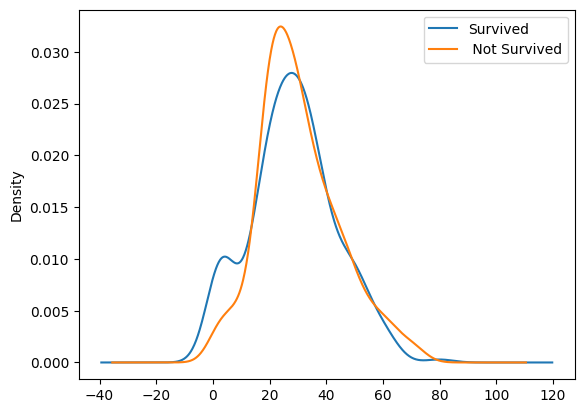

In [80]:
df[df['Survived']==1]['Age'].plot(kind='kde', label ='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde', label =' Not Survived')
plt.legend()
plt.show()

## Feature Engioneering on Fair column

In [83]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [84]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [85]:
df1= pd.read_csv('/train.csv')

In [88]:
df=pd.concat([df,df1])

In [89]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [93]:
df['individual_fare']= df['Fare']/(df['SibSp']+ df['Parch'] +1)

In [94]:
df['individual_fare']

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: individual_fare, Length: 1782, dtype: float64

In [97]:
df['Family_size']=df['SibSp'] + df['Parch']

In [98]:
# Family Type
#1 -> alone
# 2-4 -> small family
#>5 -> large family

def transform_family_size(num):
  if num==1:
    return 'alone'
  elif num>1 and num<5:
    return ' small'
  else:
    return  'large'


In [99]:
df['family_type']= df['Family_size'].apply (transform_family_size)

In [101]:
pd.crosstab(df['Survived'],df['family_type'], normalize ='columns')*100

family_type,small,alone,large
Survived,,,
0,43.150685,44.720497,70.890411
1,56.849315,55.279503,29.109589


In [107]:
df['surname'] = df['Name'].str.split(',').str.get(0)

In [108]:
df['Cabin'].fillna('M', inplace=True)

In [109]:
df['Cabin'].value_counts()

M              1374
C23 C25 C27       8
G6                8
B96 B98           8
C22 C26           6
               ... 
E34               2
C7                2
C54               2
E36               2
C148              2
Name: Cabin, Length: 148, dtype: int64

In [110]:
 df['Deck']=df['Cabin'].str[0]

In [112]:
df['Deck'].value_counts()

M    1374
C     118
B      94
D      66
E      64
A      30
F      26
G       8
T       2
Name: Deck, dtype: int64

In [114]:
pd.crosstab(df['Deck'], df['Pclass'])

Pclass,1,2,3
Deck,,,
A,30,0,0
B,94,0,0
C,118,0,0
D,58,8,0
E,50,8,6
F,0,16,10
G,0,0,8
M,80,336,958
T,2,0,0


<Axes: xlabel='Deck'>

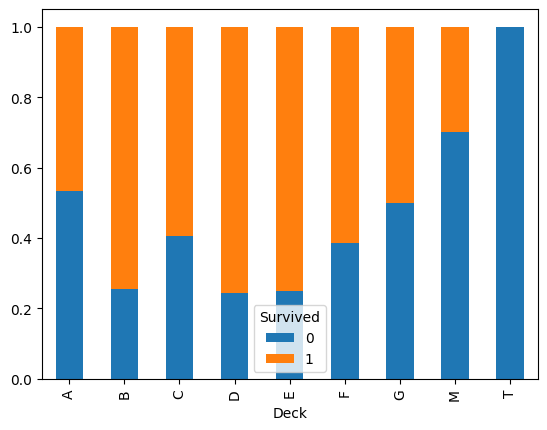

In [116]:
pd.crosstab(df['Deck'], df['Survived'], normalize='index').plot(kind='bar', stacked=True)